## Scatterplot Tutorial: Visualizing Eye Movement Events

This tutorial demonstrates how to create scatterplots for eye movement data using PyMovements, with a focus on fixation detection.

### Step 1: Import Libraries and Load Dataset

First, we need to import the necessary libraries and load our eye movement dataset. We'll use the ToyDataset for this tutorial.

In [1]:
import pymovements as pm
import polars as pl

# Load the ToyDataset
dataset = pm.Dataset('ToyDataset', path='data/ToyDataset')
dataset.download()
dataset.load()

INFO:pymovements.dataset.dataset:
        You are downloading the pymovements Toy Dataset. Please be aware that pymovements does not
        host or distribute any dataset resources and only provides a convenient interface to
        download the public dataset resources that were published by their respective authors.

        Please cite the referenced publication if you intend to use the dataset in your research.
        


Using already downloaded and verified file: data\ToyDataset\downloads\pymovements-toy-dataset.zip
Extracting pymovements-toy-dataset.zip to data\ToyDataset\raw


100%|██████████| 23/23 [00:00<00:00, 170.19it/s]



  0%|          | 0/20 [00:00<?, ?it/s]

text_id,page_id,filepath
i64,i64,str
0,1,"""aeye-lab-pymovements-toy-datas…"
0,2,"""aeye-lab-pymovements-toy-datas…"
0,3,"""aeye-lab-pymovements-toy-datas…"
0,4,"""aeye-lab-pymovements-toy-datas…"
0,5,"""aeye-lab-pymovements-toy-datas…"
…,…,…
3,1,"""aeye-lab-pymovements-toy-datas…"
3,2,"""aeye-lab-pymovements-toy-datas…"
3,3,"""aeye-lab-pymovements-toy-datas…"


### Step 2: Convert Data Units

Convert pixel coordinates to degrees of visual angle for more meaningful analysis. This step is important for proper fixation detection as dispersion thresholds are typically defined in degrees.

In [2]:
# Convert pixel coordinates to degrees of visual angle
dataset.pix2deg()

# Note: We could also compute velocity here if needed:
# dataset.pos2vel('smooth')

  0%|          | 0/20 [00:00<?, ?it/s]

text_id,page_id,filepath
i64,i64,str
0,1,"""aeye-lab-pymovements-toy-datas…"
0,2,"""aeye-lab-pymovements-toy-datas…"
0,3,"""aeye-lab-pymovements-toy-datas…"
0,4,"""aeye-lab-pymovements-toy-datas…"
0,5,"""aeye-lab-pymovements-toy-datas…"
…,…,…
3,1,"""aeye-lab-pymovements-toy-datas…"
3,2,"""aeye-lab-pymovements-toy-datas…"
3,3,"""aeye-lab-pymovements-toy-datas…"


### Step 3: Detect Fixations with Different Parameters

We'll detect fixations using the I-DT (Dispersion-Threshold) algorithm with different dispersion threshold values to create two differnet sets of fixation events that will be ploted separately.

**Key Parameters:**
- `dispersion_threshold`: Maximum dispersion allowed for fixation points (in degrees)
- `name`: Custom name for the detected events

In [3]:
# Detect fixations with standard threshold (2.7 degrees)
dataset.detect_events('idt', dispersion_threshold=2.7, name='fixation.idt')

# Detect fixations with stricter threshold (1.0 degrees)
dataset.detect_events('idt', dispersion_threshold=1.0, name='fixation1_0.idt')


0it [00:00, ?it/s]

0it [00:00, ?it/s]

text_id,page_id,name,onset,offset,duration
i64,i64,str,i64,i64,i64
0,1,"""fixation.idt""",1988145,1988563,418
0,1,"""fixation.idt""",1988564,1988750,186
0,1,"""fixation.idt""",1988751,1989178,427
0,1,"""fixation.idt""",1989179,1989436,257
0,1,"""fixation.idt""",1989437,1989600,163
…,…,…,…,…,…
0,1,"""fixation1_0.idt""",2004363,2004552,189
0,1,"""fixation1_0.idt""",2004553,2004696,143
0,1,"""fixation1_0.idt""",2004697,2004811,114


### Step 4: Compute Event Properties

Calculate fixation property `location` that will be used for visualization purposes. This property is added as a separate column named `location` in the events DataFrame, containing the coordinates of the centroid of each fixation. 

**Parameters:**
- `position_column`: Specifies which coordinate system to use for the property. The default value is in degrees, however, in order to generate fixation events containing centroids presented in pixels, its valu has to be explicitely provided. 

In [4]:
# Get the first gaze recording
gaze = dataset.gaze[0]

# Compute fixation locations using pixel coordinates
gaze.compute_event_properties(("location", {'position_column': 'pixel'}))


### Step 5: Default Scanpath Visualization

Create a basic scanpath plot to visualize the eye movement fixations. Each fixation is presented as a circle with radius proportional to the fixation duration. The method plots fixations with default name  `fixation.idt` if the argument `event_name` is not provided. 

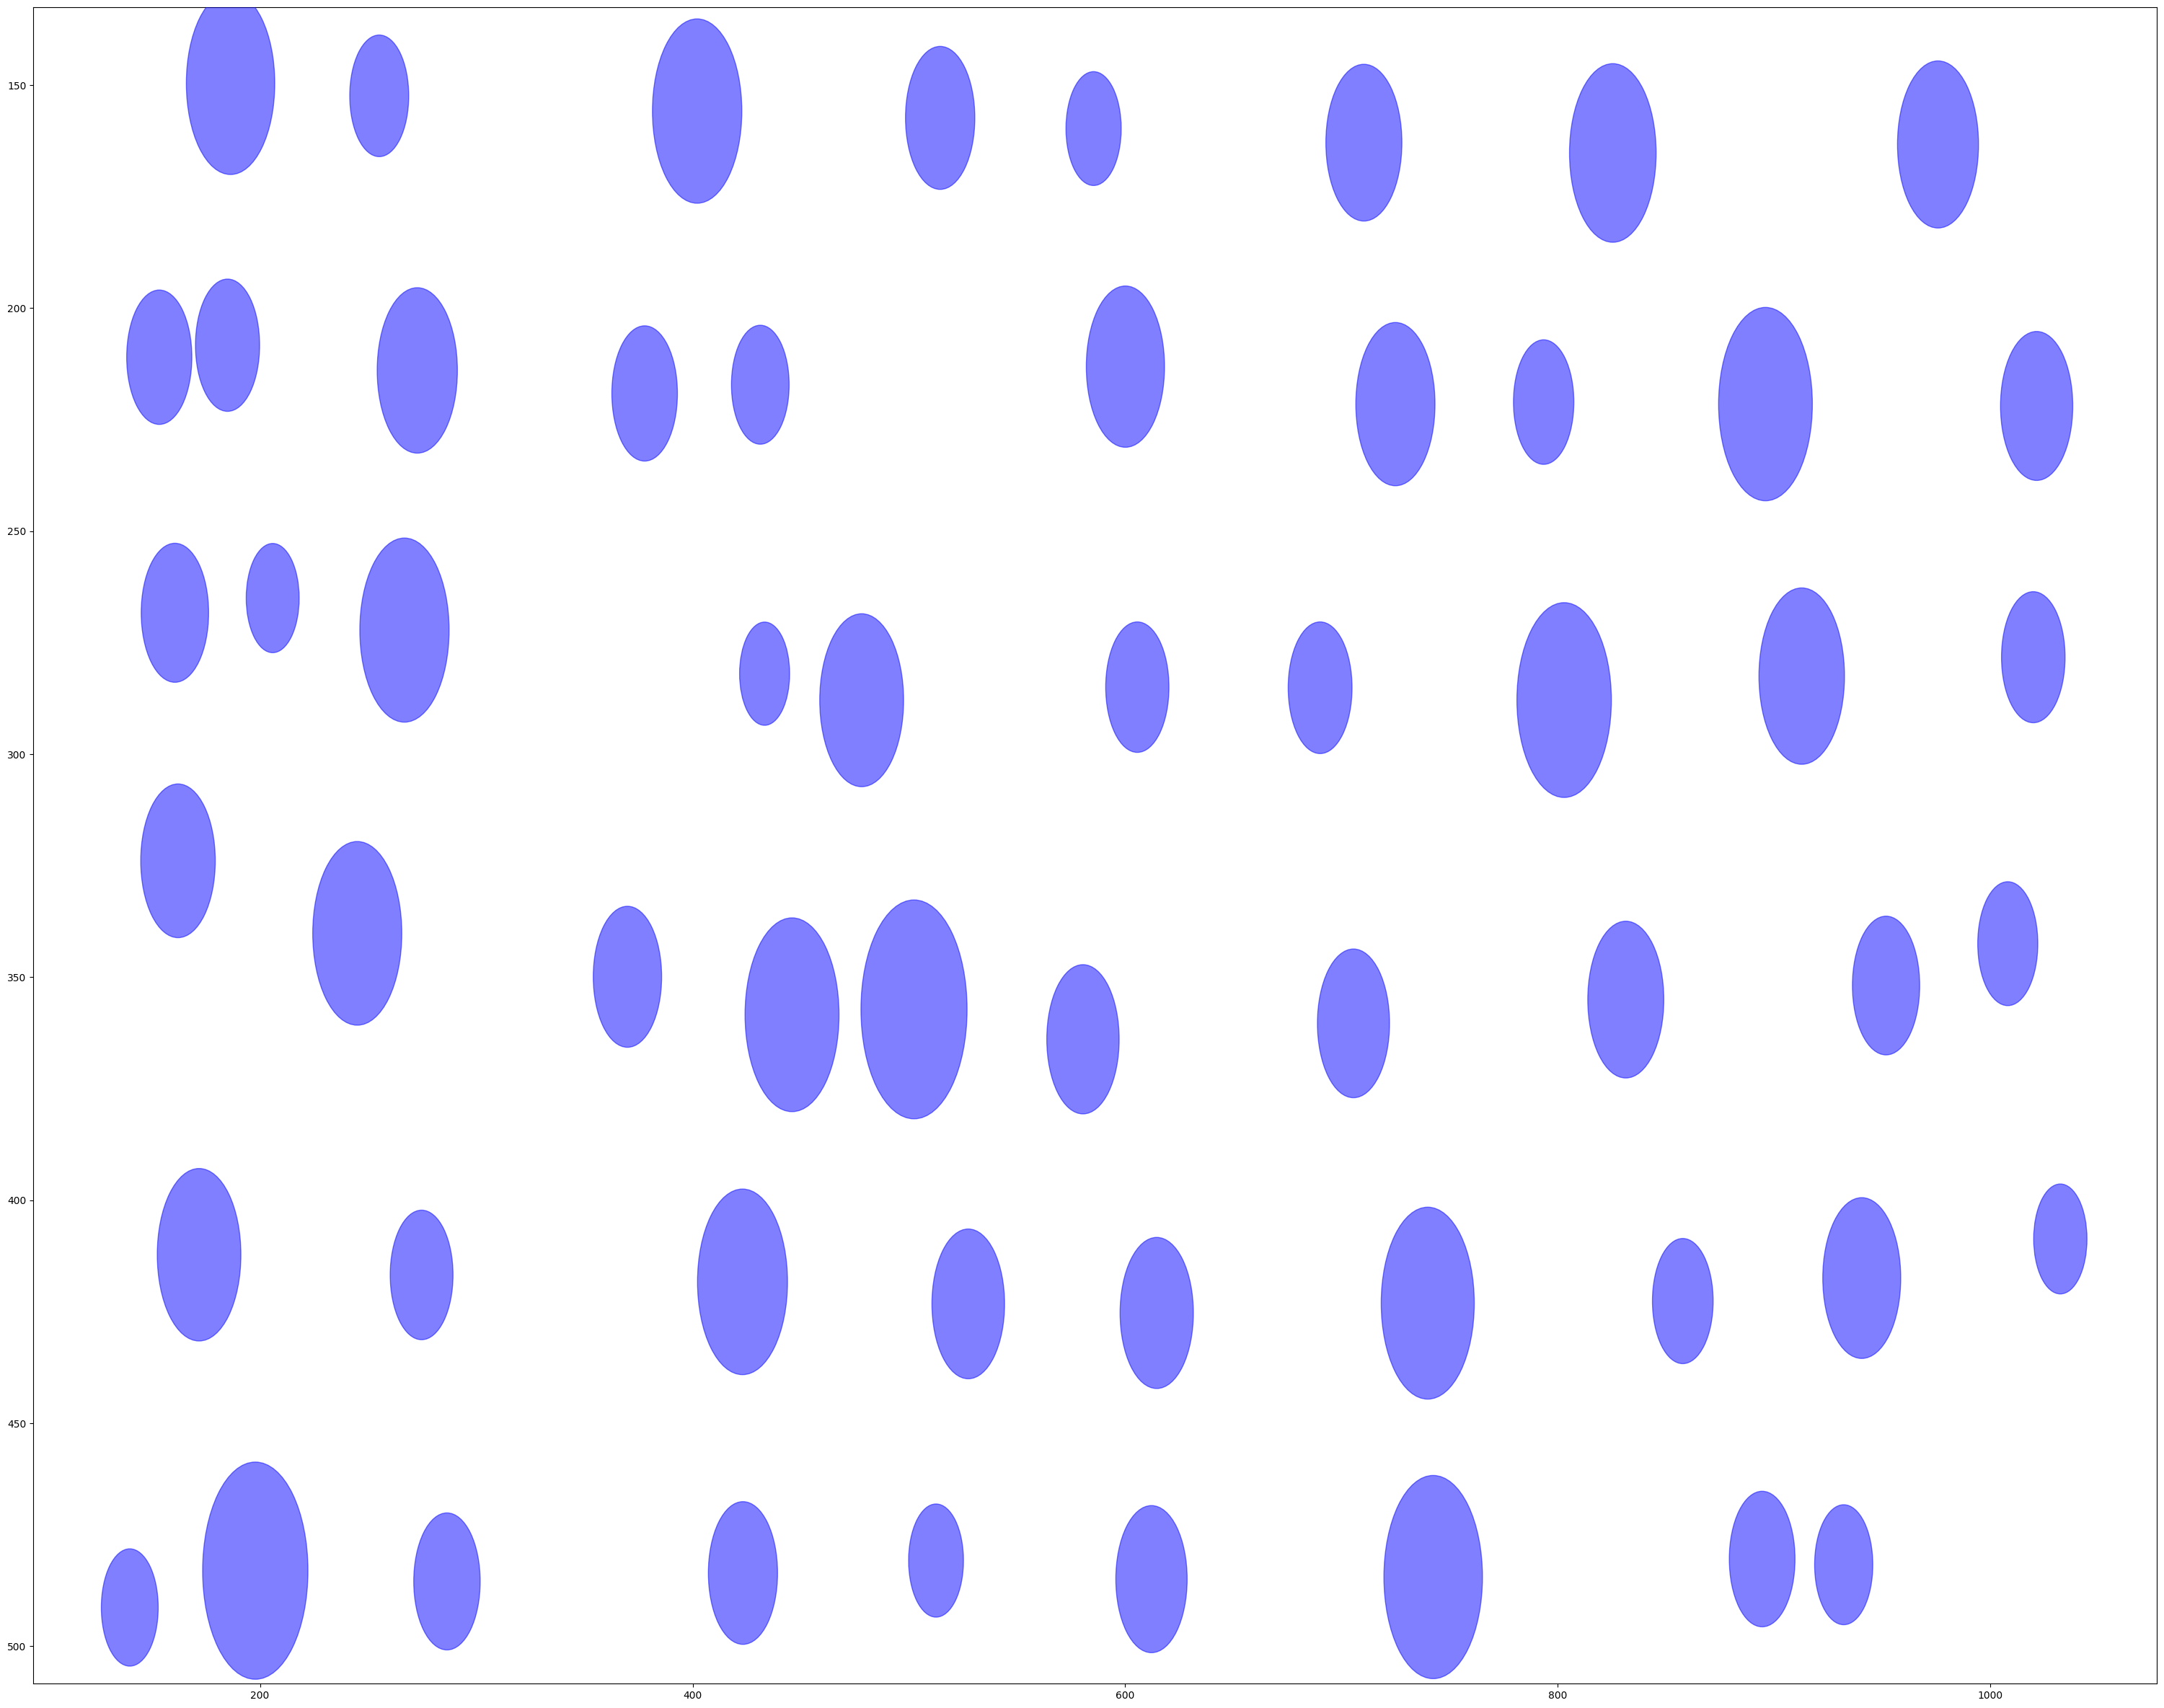

In [5]:
# Create a basic scanpath plot
pm.plotting.scanpathplot(gaze)

### Step 6: Advanced Scanpath with Trace Plot

Create an enhanced visualization that combines scanpath with trace plot. This shows both the fixation sequence with name `fixation1_0.idt` that we created in step 3 and the raw gaze trajectory.

**Key Parameters:**
- `event_name`: Specifies which fixation events to plot
- `add_traceplot`: Adds the continuous gaze trace to the plot

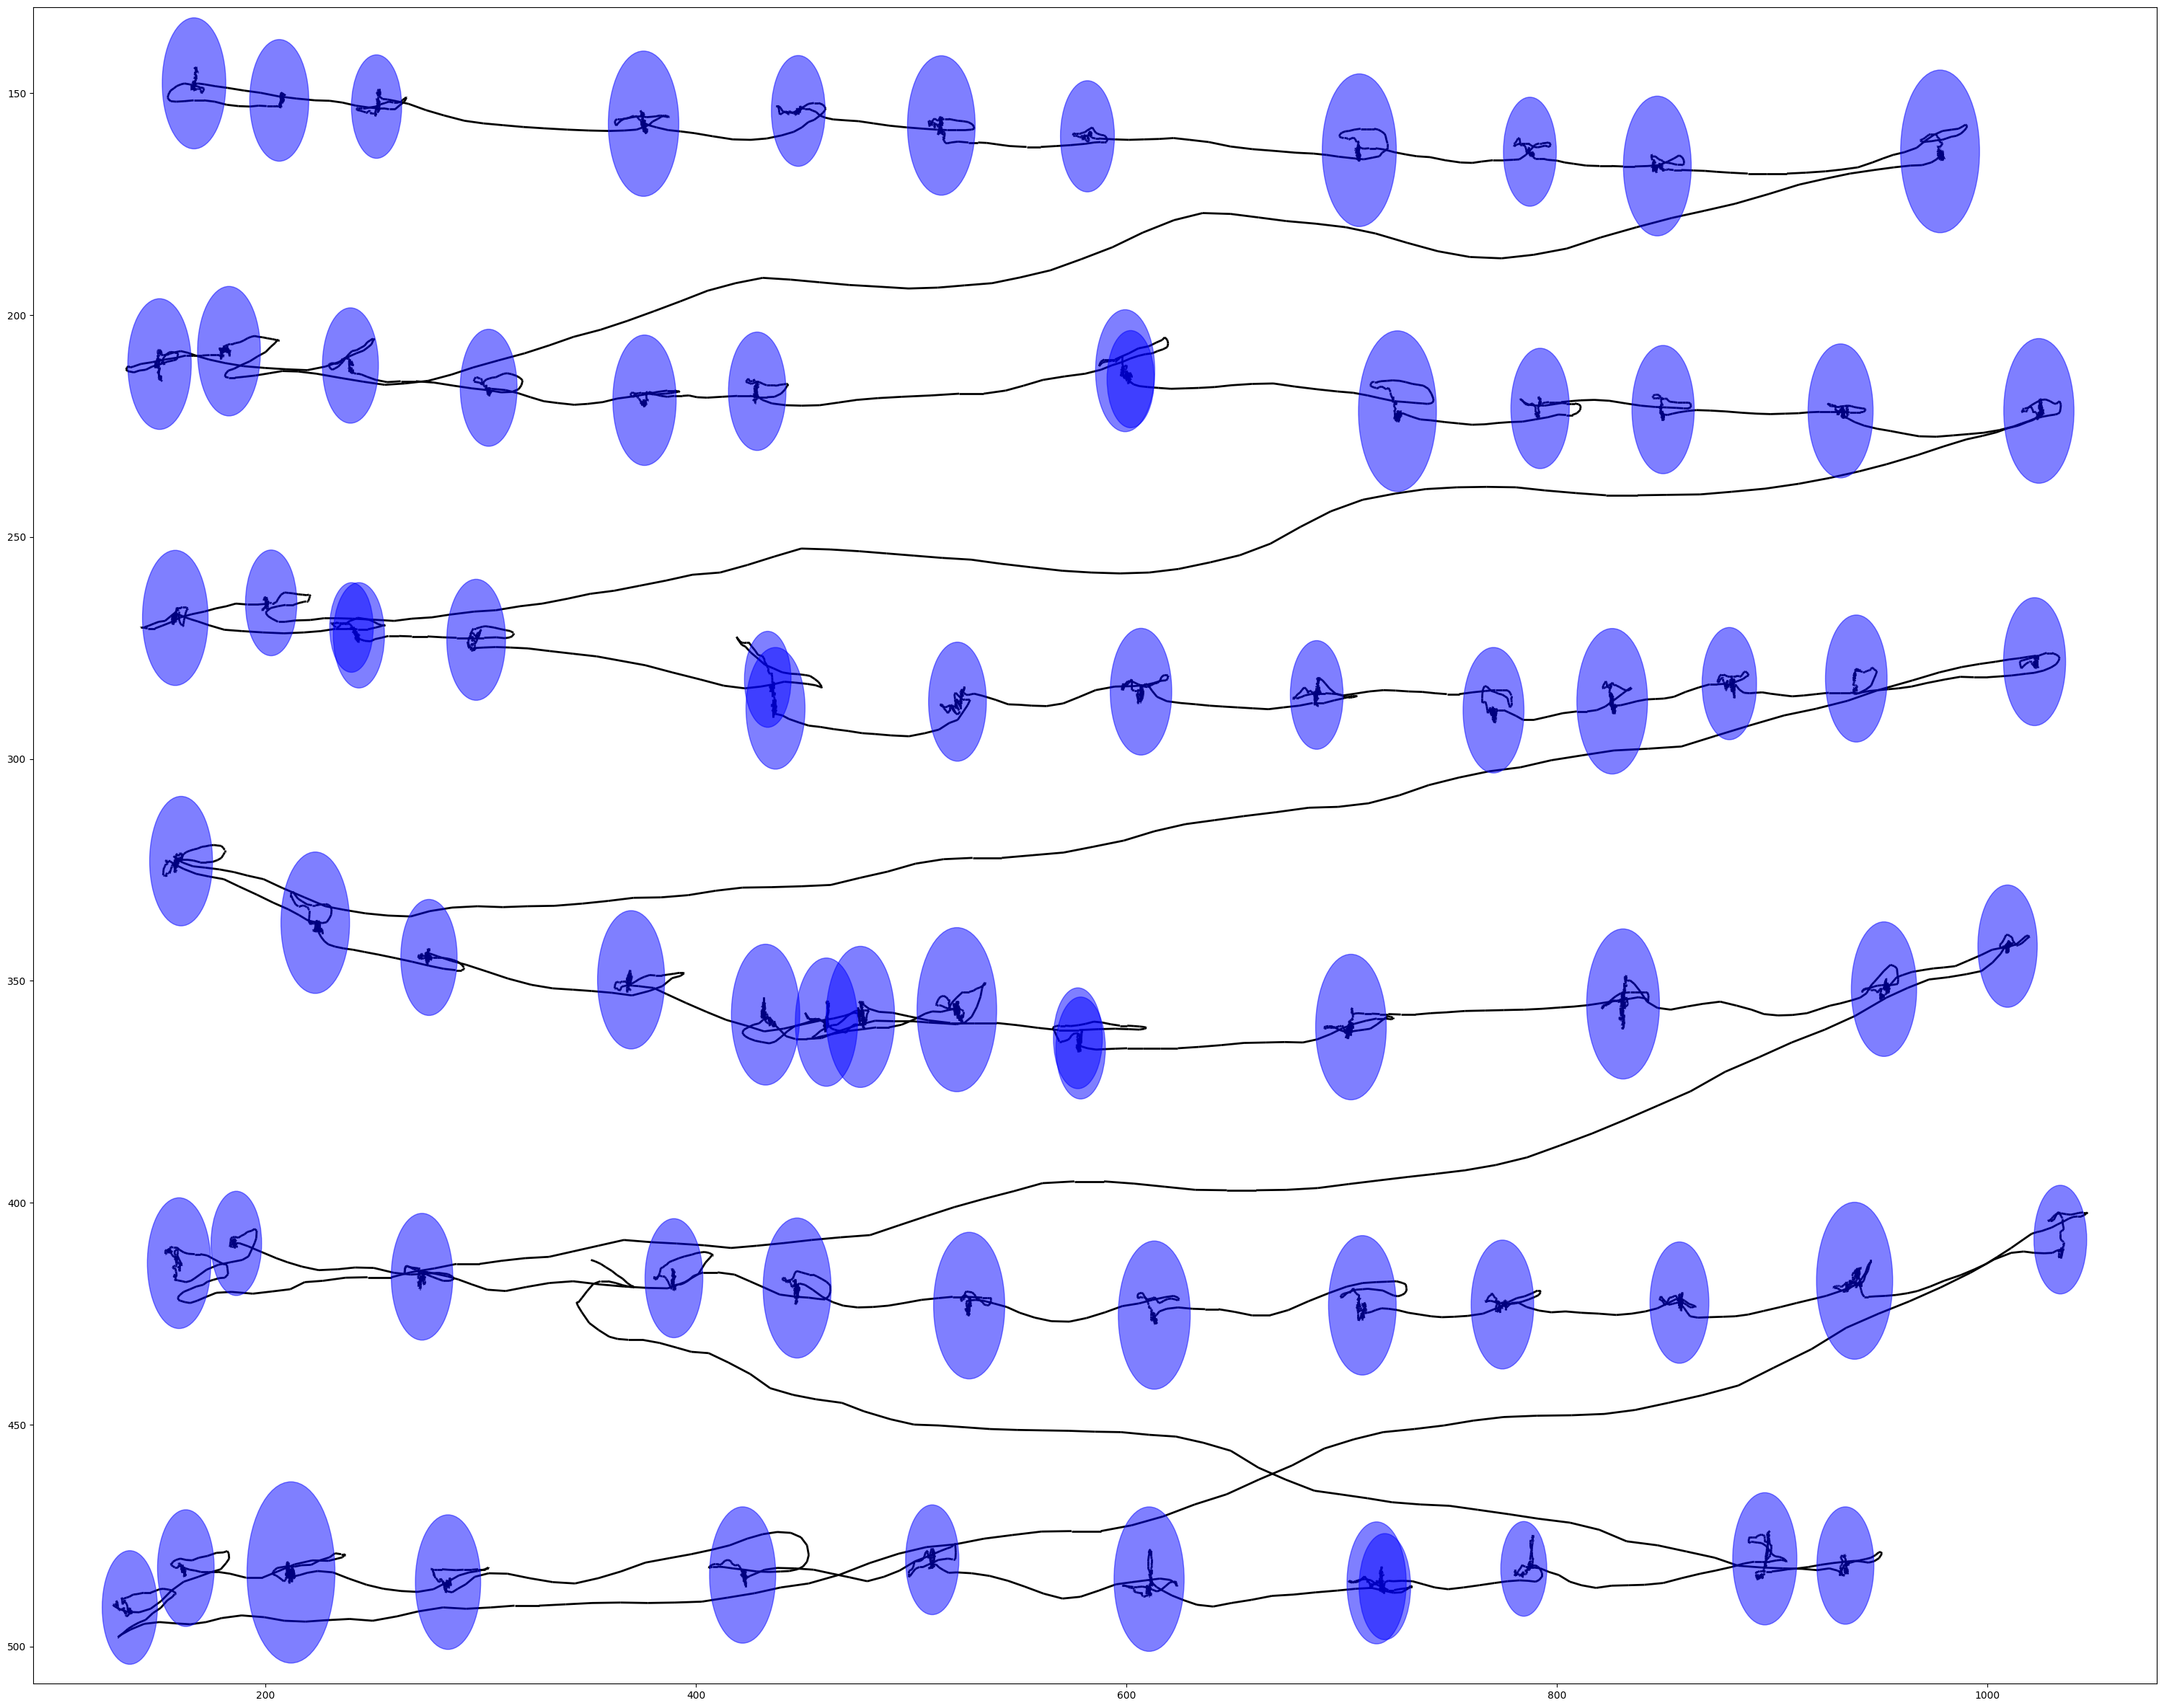

In [6]:
# Create enhanced scanpath plot with trace
pm.plotting.scanpathplot(gaze, event_name='fixation1_0.idt', add_traceplot=True)

### What you have learned in this tutorial:
* **Data Loading**: Importing and preparing eye movement data 
* **Fixation Detection**: Creating different sets of fixations with different dispersion thresholds
* **Property Computation**: Calculating fixation locations and properties
* **Visualization**: Creating scanpath plots with various parameters

